# Data Cleaning with Employee Exit Surveys

This project will highlight data cleaning skills using different pandas data combining and cleaning techniques.  The data are taken from exit surveys from the Depatment of Education, Training and Employmeet [(data here)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey),  and the Technical and Further Education Instatute in Queensland Autrailia [link to data](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

In [632]:
import pandas as pd
import numpy as np
%matplotlib inline

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

Information about the dete_survey: there are 56 columns with 821 rows.  Several of the rows have missing data

In [633]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [634]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Information about the dete_survey: there are 56 columns with 821 rows. Several of the rows have missing data.  The last rows look to be boolean values, with most rows empty and a "checkbox" for where the person is from and information about their status. 


In [635]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [636]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

The TAFE survey has verbose column names that are sentences.  We will want to combine that into column names that are easier to read.  The TAFE survey has 72 columns and 701 rows.  There appear to be null values in every column, but they are spread throughout the columns, whereas the DETE data has some columns that are almost exclusively null.

In [637]:
total_rows_tafe= len(tafe_survey)-1
total_rows_dete = len(dete_survey) -1
i=0
j=0
for column in tafe_survey.columns:
    perc_null= 100*tafe_survey[column].isnull().sum()/total_rows_tafe
    if perc_null>=5:
        i+=1
        
for column in dete_survey.columns:
    perc_null= 100*dete_survey[column].isnull().sum()/total_rows_dete
    if perc_null>=5:
        j+=1
        
print("There are {} columns with over 5% null values in the tafe_survey".format(i))
print("There are {} columns with over 5% null values in the dete_survey".format(j))

There are 67 columns with over 5% null values in the tafe_survey
There are 12 columns with over 5% null values in the dete_survey


<h2> Step 2: Removing Missing Data </h2>
I will reread the dete_survey and tafe_survey again using drop methods to remove columns and rows that are not needed for analysis.

In [638]:
dete_survey= pd.read_csv("dete_survey.csv", na_values= "Not Stated")
dete_survey_updated= dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated= tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

<h2>Step 3: Changing the Column Names for Merging</h2>

I will now change the column names to make the data easier to merge into one dataframe.  First I will use string methods to make all othe capitalization lowercase, remove trailing whitespace, and replace spaces with underscrores in the dete_survey_updated dataframe.

In [639]:
dete_survey_updated.columns= dete_survey_updated.columns.str\
                            .lower().str\
                            .strip().str\
                            .replace(" ", "_")
print("These are the new column names in dete_updated")
for column in dete_survey_updated.columns:
    print(column)

These are the new column names in dete_updated
id
separationtype
cease_date
dete_start_date
role_start_date
position
classification
region
business_unit
employment_status
career_move_to_public_sector
career_move_to_private_sector
interpersonal_conflicts
job_dissatisfaction
dissatisfaction_with_the_department
physical_work_environment
lack_of_recognition
lack_of_job_security
work_location
employment_conditions
maternity/family
relocation
study/travel
ill_health
traumatic_incident
work_life_balance
workload
none_of_the_above
gender
age
aboriginal
torres_strait
south_sea
disability
nesb


In [640]:
#renaming the columns using the rename() method
tafe_column_dict= {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated= tafe_survey_updated.rename(tafe_column_dict, axis=1)
tafe_survey_updated.head()


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [641]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Both of these dataframes' columns look like how we would like to see them.  We made these changes to shorten the length of the names and so that we will be able to merge them later.

<h2> Step 4: Removing More Data </h2>

We will first use the value counts method to see the unique values in several columns.  Then will explore the data and remove values that may have typos or missspellings.

In [642]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

These data look fairly clean, let's look at the tafe_survey to see how this column looks:

In [643]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

I will only select "Resignations" moving forward.

In [644]:
#Changing all resignation types to resignations in the date_survey_updated
dete_survey_updated["separationtype"]= dete_survey_updated["separationtype"].str\
                                        .split("-")\
                                        .str[0]


In [645]:
# Select only the resignation entries from the dataframes
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]== "Resignation"].copy()

I am only selecting the resignations columns as they may be more of an indication of dissatisfaction at work instead of "retirement" or other values.

<h2> Step 5: Verifying Years Data </h2>

I will look at years data to ensure that the years data makes sense before continuing with my analysis.

In [646]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

It appears that some of the data have dates while others have years, I will use string methods to extract only the years.

In [647]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
dete_resignations["cease_date"].value_counts().sort_index(ascending= True)
                        

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

Great- now there are only years in the dete "cease_date" column.  Let's look at the tafe data

In [648]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [649]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

I have cleaned the data from the resignation dates, but it doesn't appear that the start dates are incorrect.  They are also in float format, and match the resignation dates.

<h2> Step 6: How long were people employed before exiting? </h2>

I will examine the length of time that people were employed before exiting employment.  This may coorelate to their overall satisfaction, presumably people who are unsatisfied with their position would leave after less time than people who are satisfied at their positions.

In [650]:
dete_resignations["institute_service"]= dete_resignations["cease_date"]- dete_resignations["dete_start_date"]
dete_resignations["institute_service"].describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

The majority of workers resigned (or completed the survey) after between 3 and 16 years of work.  The max amount of time for a resignation was 49 years!

<h2> Step 7: Dissatisfaction in the TAFE Data </h2>

I will convert the dissatisfaction columns to True, False, or NaN so that I can view if the person left because of dissatisfaction with their position or another reason.

In [651]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [652]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [653]:
# Writing a function to convert values to NaN, False or True

def dissatsifaction_convert(value):
    if value=="-":
        return False
    
    elif pd.isnull(value):
        return np.nan
    
    else:
        return True

In [654]:
tafe_resignations["dissatisfied"]= tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(dissatsifaction_convert). any(axis=1, skipna=False)
tafe_resignations_up= tafe_resignations.copy()
tafe_resignations_up["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [655]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [656]:
# Creating the job dissatsifation column for the dete _resignations
dete_resignations["dissatisfied"] = dete_resignations[['interpersonal_conflicts',
                                                       'job_dissatisfaction',
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment', 
                                                       'lack_of_recognition',
                                                       'lack_of_job_security', 
                                                       'work_location', 
                                                       'employment_conditions']]\
                                        .any(axis=1, skipna=False)

dete_resignations_up= dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts()

False    202
True     109
Name: dissatisfied, dtype: int64

I have created a column in both datasets that displays a boolean value (or NaN) for if an employee left their posisition based on job dissatisfaction.  This will allow for comparison between the two datasets.

<h2> Step 8: Combining Datasets </h2>

The goal is to aggregate data in order to have a larger dataset to compare employee surveys.


In [657]:
# Adding a column to each datafram that will allow us to distinguish them

dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"


In [658]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


These changes allow us to dramatically reduce the number of columns in the dataframe(specifically columns with more than 500 na values) and see the information that we need for analysis.

<h2> Step 9: Cleaning the "Institute Service" Column </h2>

This column shows how long someone has worked at the institute before leaving.  We will convert values in this column to allow for comparison between values.
    


In [659]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


I will use the following ranges to create catagories for these service times:


    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company


In [660]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [661]:
def year_mapper(year):
    if pd.isnull(year):
        return np.nan
    elif year<3.0:
        return "New"
    elif year<6.0:
        return "Experienced"
    elif year<11.0:
        return "Established"
    else:
        return "Veteran"

    
combined_updated["service_cat"]= combined_updated["institute_service_up"].apply(year_mapper)
combined_updated["service_cat"].value_counts()

New            193
Experienced    155
Veteran        136
Established     79
Name: service_cat, dtype: int64

The majority of the employees who resigned were new or experienced.  It may be interesting to see if newer employees had higher rates of leaving because of dissatisfaction.

<h2> Step 9: Dissatisfied Employees: An Initial Analysis </h2>

I will plot the percentage of dissatisfied employees in each service_cat group and analyze if any groups had more dissatisfied employees than others.

In [662]:
# Looking at the True/False values in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    443
True     200
NaN        8
Name: dissatisfied, dtype: int64

In [663]:
# There are so few NaN, I am going to fill them with False because it occurs most often
combined_updated["dissatisfied"]= combined_updated["dissatisfied"].fillna(False)

In [664]:
#To see the percentage of employees who left because they were dissatisfied
diss_pivot_tbl= combined_updated.pivot_table(index= "service_cat", values= "dissatisfied")

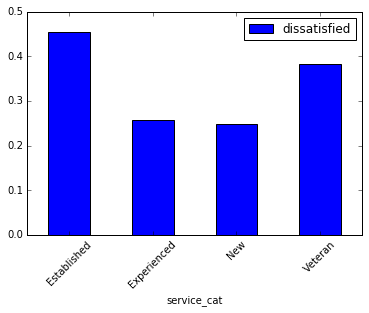

In [669]:
diss_pivot_tbl.plot(kind='bar', rot= 45)

It appears that veteran, established, and experienced employees tend to leave more than new employees.  This could be for several reasons.  Perhaps new employees leave for new opportunities more than someone who may be at retirement age.  New employees also may be less established in their career and need references, making them less likely to identify dissatisfaction as the issue for their departure.